In [1]:
import wptherml
from matplotlib import pyplot as plt
import numpy as np
import os
from scipy import interpolate
import glob
import colour
from colour.plotting import *

# create a tungsten incandescent object at 1700 K
tungsten_values = {
    "wavelength_list": [400e-9, 700e-9, 200],
    "Material_List": ["Air",  "W", "Air"],
    "Thickness_List": [0, 900e-9, 0],
    "temperature": 1700,
    "therml": True
}


sf = wptherml.SpectrumFactory()
w = sf.spectrum_factory('Tmm', tungsten_values)


 Your spectra have been computed! 😎 
 Your therml spectra have been computed! 🔥 


Read in the emission spectra data from the Meth_and_Propoxy_TTz folder!

In [2]:
file_location = os.path.join('Meth_and_Butoxy_TTz','*.txt')
filenames = glob.glob(file_location)
print(filenames)

['Meth_and_Butoxy_TTz/4.2.txt', 'Meth_and_Butoxy_TTz/6.1.txt', 'Meth_and_Butoxy_TTz/4.3.txt', 'Meth_and_Butoxy_TTz/4.1.txt', 'Meth_and_Butoxy_TTz/6.3.txt', 'Meth_and_Butoxy_TTz/6.2.txt', 'Meth_and_Butoxy_TTz/2.2.txt', 'Meth_and_Butoxy_TTz/2.3.txt', 'Meth_and_Butoxy_TTz/2.1.txt', 'Meth_and_Butoxy_TTz/7.3.txt', 'Meth_and_Butoxy_TTz/5.1.txt', 'Meth_and_Butoxy_TTz/7.2.txt', 'Meth_and_Butoxy_TTz/5.2.txt', 'Meth_and_Butoxy_TTz/5.3.txt', 'Meth_and_Butoxy_TTz/7.1.txt', 'Meth_and_Butoxy_TTz/3.1.txt', 'Meth_and_Butoxy_TTz/1.3.txt', 'Meth_and_Butoxy_TTz/1.2.txt', 'Meth_and_Butoxy_TTz/3.2.txt', 'Meth_and_Butoxy_TTz/1.1.txt', 'Meth_and_Butoxy_TTz/3.3.txt', 'Meth_and_Butoxy_TTz/11.3.txt', 'Meth_and_Butoxy_TTz/11.2.txt', 'Meth_and_Butoxy_TTz/11.1.txt', 'Meth_and_Butoxy_TTz/9.3.txt', 'Meth_and_Butoxy_TTz/9.2.txt', 'Meth_and_Butoxy_TTz/9.1.txt', 'Meth_and_Butoxy_TTz/10.1.txt', 'Meth_and_Butoxy_TTz/10.3.txt', 'Meth_and_Butoxy_TTz/10.2.txt', 'Meth_and_Butoxy_TTz/8.1.txt', 'Meth_and_Butoxy_TTz/8.3.txt', '

Now read in the emission spectra from each file, compute the CIE and RGB values for each spectrum, print
the filename and CIE values, and store the RGB values to a list.  We will use that RGB list subsequently to plot the values on the CIE color gamut.

In [3]:

rgb_list = []
for file in filenames:
    data = np.loadtxt(file)
    emission_spline = interpolate.interp1d(data[:,0], data[:,1])
    # make sure this spline is good!
    assert np.allclose(emission_spline(data[:,0]), data[:,1], 1e-4)
    emission_prediction = emission_spline(w.wavelength_array * 1e9)   
    cie = w.compute_cie(emission_prediction)
    rgb = w.compute_rgb(emission_prediction)
    rgb_list.append(rgb)
    print(F"{file[20:]}, {cie[0]}, {cie[1]}, {cie[2]}")

4.2.txt, 0.2376624562792153, 0.26428103133240893, 0.4980565123883757
6.1.txt, 0.1843644027307847, 0.18990891565547152, 0.6257266816137438
4.3.txt, 0.21462838170558254, 0.24162551834020488, 0.5437460999542126
4.1.txt, 0.21965342704682286, 0.23303945573895693, 0.5473071172142202
6.3.txt, 0.1832648942595531, 0.1896346940991123, 0.6271004116413347
6.2.txt, 0.18391588030623102, 0.19053152986459568, 0.6255525898291733
2.2.txt, 0.37289520272863225, 0.42387606094673796, 0.20322873632462984
2.3.txt, 0.3708359654800134, 0.42738276672322967, 0.2017812677967569
2.1.txt, 0.36845249732223373, 0.42620482507908974, 0.2053426775986765
7.3.txt, 0.17811217611837069, 0.19407825453905256, 0.6278095693425768
5.1.txt, 0.190305991044037, 0.1966850220478991, 0.6130089869080639
7.2.txt, 0.18134992394052243, 0.19449835915974825, 0.6241517168997291
5.2.txt, 0.19186844821671334, 0.19918352297941874, 0.6089480288038679
5.3.txt, 0.19172113804228666, 0.20173929277574315, 0.6065395691819703
7.1.txt, 0.1790832796648939

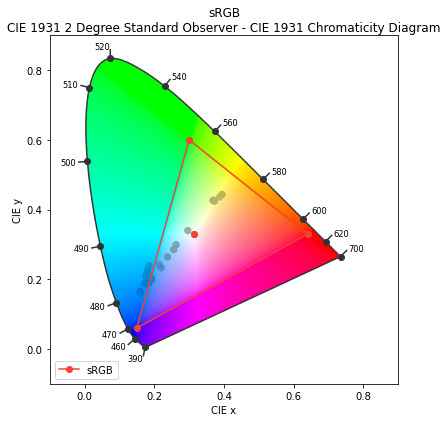

(<Figure size 432x432 with 1 Axes>,
 <AxesSubplot:title={'center':'sRGB\nCIE 1931 2 Degree Standard Observer - CIE 1931 Chromaticity Diagram'}, xlabel='CIE x', ylabel='CIE y'>)

In [4]:
plot_RGB_chromaticities_in_chromaticity_diagram_CIE1931(rgb_list, c='black')